<a href="https://colab.research.google.com/github/Migaalee/machine_learning/blob/main/Assigment2_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project description
## Objective
The goal of this assignment is to examine a set of bacterial cell images using machine learning techniques, including feature extraction, features selection and clustering, in order to help the biologists organize similar images. 
You will load all images, extract features, examine them and select a subset for clustering with the goal of reaching some conclusion about the best way of grouping these images.

## Dataset 
Images: bacteria; size: 50x50 pixels, with a black background and the segmented region centered in the image.

# Import all packages that will be used

In [93]:
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates,radviz, scatter_matrix
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#from sklearn.preprocessing import StandardScaler -penso que nao devemos fazer standardizacao da data pq muda a sua forma

from sklearn.feature_selection import f_classif #for the anova
from sklearn.feature_selection import SelectKBest

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

from sklearn.neighbors import KNeighborsClassifier #NAO USEI AINDA
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.cluster import adjusted_rand_score, rand_score
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import pairwise_distances, adjusted_rand_score, silhouette_score

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import pair_confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



#from metrics import conf,accuracy,precision,recall,F1

#Add documents below
#from tp2_aux import report_clusters,images_as_matrix

#Only for google collabs
from google.colab import files #this is to load files from your local disk


# Upload data

Auxiliary document upload

In [96]:
TP2_aux = files.upload() 

Saving tp2_aux.py to tp2_aux (2).py


Data set

In [95]:
data = files.upload()

Saving images.zip to images (2).zip


In [97]:
import zipfile
import io
images = zipfile.ZipFile(io.BytesIO(data['images.zip']), "r")
images.extractall()

Import labels

In [98]:
y = files.upload()

Saving labels.txt to labels (2).txt


# Data preparation

Use the images_as_matrix function to return a 2D numpy array with one image per row (563 rows) and one pixel per column (50x50=2500 columns) from the images in the images folder.

In [99]:
from tp2_aux import images_as_matrix
X = images_as_matrix(N=563)

# Features Extraction

With each method, extract six features from the data set, for a total of 18 features.

###Principal Component Analysis (PCA)
This is a method of dimensionality reduction that computes new features maximizing the preserved variance of the original data set. It transforms the data into an orthogonal set of coordinates so that the values along each coordinate are not correlated. 

In this case, we should not standardize or normalize the data because doing so will distort its shape.


In [107]:
pca = PCA(n_components = 6) #number of features we want to extract that correspond to the principal components
X_pca = pca.fit_transform(X) #create a new matrix X, X_pca, with the new six features 
#intrepretation: prints the first 6 PC for each image

In [108]:
#Dataframe with the values of the first 6 PCA for all examples 
df_pca = pd.DataFrame(X_pca, columns = ['pca1','pca2','pca3','pca4','pca5','pca6'])
print(df_pca) 

            pca1        pca2         pca3        pca4        pca5         pca6
0   -1566.769060  256.972338   134.894377    0.425837  -78.218422    42.330511
1   -1096.790534 -259.430894   281.108140  140.740964  486.230477   337.661984
2   -1899.446655  -88.053974   188.661985   18.244986   11.080678  -351.743220
3   -1102.846546 -258.014858  -215.959223 -175.719501 -118.138514   -17.899378
4   -1713.854832 -441.738626   -58.189251  111.578537   86.092538   105.249152
..           ...         ...          ...         ...         ...          ...
558   766.613222 -693.642373  1191.752013   43.696753  195.632951  -181.292141
559 -1446.305757  440.792001   555.953472  349.497390 -388.069124  1224.618402
560 -1607.762033 -339.039526   471.903430  266.075065   42.669556   243.056386
561   200.021657 -567.829974   950.199753  125.973468 -700.381672  -788.102494
562  -320.936427  914.236162   623.763293  320.712169  536.389389  -289.600441

[563 rows x 6 columns]


###t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [109]:
tsne = TSNE(n_components = 6, method = 'exact') #method = ’barnes_hut’ is the default. method = 'exact' runs a slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. However, the exact method cannot scale to millions of examples.
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [110]:
#Dataframe
df_tsne = pd.DataFrame(X_tsne,columns = ['tsne1','tsne2','tsne3','tsne4','tsne5','tsne6'])
print(df_tsne)


         tsne1      tsne2      tsne3      tsne4      tsne5      tsne6
0    50.841064   8.660800 -40.277271 -22.305994 -26.271973  11.736073
1   -11.090586   4.056133  -2.422562  -3.527745 -24.078526   3.834678
2     2.888716 -17.122158  -8.101047 -10.460500 -13.653986  -1.809789
3    12.424844  -1.961421   0.873918  -9.952971  -9.486608  10.148774
4    -2.058026  -7.274770  -9.297343  -5.657743 -14.416206  -9.546916
..         ...        ...        ...        ...        ...        ...
558  -5.586277   5.458474   1.800598  13.239349  10.899914 -11.319702
559   3.865036 -10.061337  13.009563 -21.405125  -9.180298  -4.814086
560  -7.857260 -11.201371  -3.000309 -12.256536 -10.673262 -15.329851
561  -2.479975   4.139366  -8.542042  18.407391  -0.616407  16.140177
562  -6.539582  -3.896370  10.799538 -16.926683   5.017816   9.300527

[563 rows x 6 columns]


###Isometric mapping with Isomap

In [111]:
isomap = Isomap(n_components = 6, n_neighbors=5) #5 é o numero de neighbours por default
X_isomap = isomap.fit_transform(X)

In [112]:
#Dataframe
df_isomap = pd.DataFrame(X_isomap,columns = ['im1','im2','im3','im4','im5','im6'])
print(df_isomap)

             im1          im2  ...         im5          im6
0   -3542.154360   985.098659  ...   15.216278  1308.514337
1   -3150.522163  -585.940269  ...  655.008573   813.251967
2   -4943.865828    85.856124  ... -407.711430  1107.826303
3   -2305.977768  -639.373716  ... -606.680737    76.015657
4   -3927.758208  -839.460439  ...  613.825335   994.550631
..           ...          ...  ...         ...          ...
558  2725.343066   720.793744  ...  961.556475  -839.706573
559 -4475.871424  1152.987403  ...  371.217944   588.210993
560 -4567.669782    36.818054  ...  423.216752  1478.428098
561  3365.305026  -210.677432  ... -544.573532  -313.341049
562  -896.830004  3109.392351  ...  782.954261   634.254161

[563 rows x 6 columns]


### Dataframe with 18 features and labels

In [113]:
#Transform the labels document into a pandas dataframe 
labels = np.loadtxt('labels.txt', delimiter=',')
y = labels[:,1].reshape(-1,1)
y = pd.DataFrame(y, columns = ['y'])

#Create a dataframe with the 18 features and the y values
df_total = pd.concat((df_pca, df_tsne, df_isomap, y), axis=1)
#print(df_total) 
#Select only the rows when y != 0
df_evaluated = df_total[df_total['y'] > 0]
df_evaluated.pop("y")

y_evaluated = y[y['y'] > 0]


# Label encoding for categoricals
for colname in df_evaluated.select_dtypes("object"):
    df_evaluated[colname], _ = df_evaluated[colname].factorize()

# Discrete features
discrete_features = df_evaluated.dtypes == int


# Feature selection

### Analysis of Variance (ANOVA) F-test


In [114]:
#Evaluate the most usefull features with ANOVA
f, prob = f_classif(df_evaluated,y_evaluated) 

f_scores = pd.Series(f, name="F Scores", index=df_evaluated.columns)
print(f_scores.sort_values(ascending=False)) 

prob = pd.Series(prob, name="prob", index=df_evaluated.columns)
print(prob.sort_values(ascending=True)) 

pca2     46.633882
im2      42.177493
im1      21.995044
pca3     19.187784
tsne3    10.040403
pca1      7.842584
tsne4     5.536797
im3       2.724466
im4       2.360416
tsne1     1.531141
tsne2     1.509748
pca6      1.262610
tsne5     1.023752
tsne6     0.916733
im5       0.783035
im6       0.753187
pca4      0.339143
pca5      0.281636
Name: F Scores, dtype: float64
pca2     4.768042e-14
im2      3.832921e-13
im1      2.660922e-08
pca3     1.671394e-07
tsne3    1.317992e-04
pca1     7.880010e-04
tsne4    5.642602e-03
im3      7.182554e-02
im4      1.010901e-01
tsne1    2.227180e-01
tsne2    2.273513e-01
pca6     2.886321e-01
tsne5    3.640201e-01
tsne6    4.040872e-01
im5      4.605760e-01
im6      4.742568e-01
pca4     7.134260e-01
pca5     7.553122e-01
Name: prob, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### SelectKbest method (uses ANOVA as well)

pca2     46.633882
im2      42.177493
im1      21.995044
pca3     19.187784
tsne3    10.040403
pca1      7.842584
tsne4     5.536797
im3       2.724466
im4       2.360416
tsne1     1.531141
tsne2     1.509748
pca6      1.262610
tsne5     1.023752
tsne6     0.916733
im5       0.783035
im6       0.753187
pca4      0.339143
pca5      0.281636
Name: Selector Scores, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


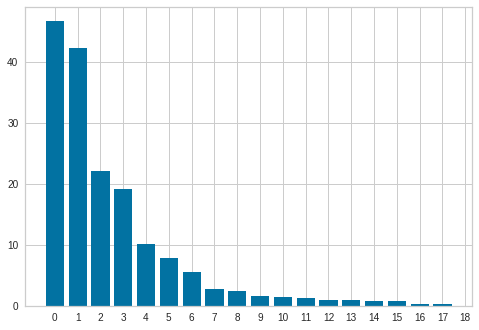

In [115]:
#Evaluate the most usefull features with Select K Best - Lecture 15
selector = SelectKBest(f_classif, k=7)
X_final = selector.fit_transform(df_evaluated, y_evaluated)

selector_scores = pd.Series(selector.scores_, name="Selector Scores", index=df_evaluated.columns)
print(selector_scores.sort_values(ascending=False)) 

from matplotlib import pyplot
plt.xticks(range(0, 19))
pyplot.bar( [i for i in range(len(selector_scores))], selector_scores.sort_values(ascending=False))
pyplot.show()

In [126]:
cols = selector.get_support(indices=True)
features_df_new = df_evaluated.iloc[:,cols]

Scatter matrix


In [117]:
#scatter_matrix(df_evaluated, alpha=0.5, figsize=(10,7), diagonal='kde')

### Feature correlation matrix

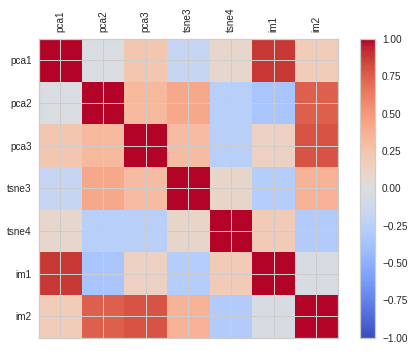

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = features_df_new
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

#Here we can see that pca1 and im1 is very correlated, so we should choose one of them. Pca1 had a lower score in Kbest and also lower F value, so im1 is a better feature.

### Mutual information criteria

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [119]:
MI = mutual_info_classif(features_df_new, y_evaluated)
mi_scores = pd.Series(MI, name="MI Scores", index=features_df_new.columns)
print(mi_scores.sort_values(ascending=False)) 
#Estimated mutual information between each feature and the target.
#we can see that some of the features have a modestly low score, such as pca1, suggesting that perhaps they can be removed. 
# We can choose 3 features: PCA2 (col1), IM1 (col12), IM2 (col13). Or 2 features would be: PCA2 (col1), IM2 (col13).

pca2     0.410035
im1      0.341470
im2      0.331820
tsne3    0.256101
tsne4    0.185028
pca3     0.177537
pca1     0.095247
Name: MI Scores, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Manual feature selection explanation



*   First, from 18 extracted features, we have decided to choose features with highest variance between classes (highest F-score in ANOVA F test). This resulted in the selection of initial 7 features (pca1, pca2, pca3, im1, im2, tsne1, tsne3)

*   Next, by looking at feature correlation matrix, we have noticed that pca1 and im1 features are highly correlated. Since im1 had a higher F score, we decided to remove pca1 from our selected features. 

*   Next, when looking at mutual information criteria, we have observed that some features have a low score MI score (pca1, pca3, tsne1, tsne3), hence such features exhibit a very low relationship with our class labels. 


*  For our clustering algorithms we have decided to use either 3 feature (pca2, im1 and im2) or 2 feature (pca2 and im2) data. 



In [127]:
# 2 features

features_2 = df_total.iloc[:,[1,13,18]]
Y_features_2 = features_2.iloc[:,-1]
X_features_2 = features_2.iloc[:, features_2.columns != 'y']

#Normalize the data by z-score
means2 = X_features_2.mean(axis=0) 
std2=X_features_2.std(axis=0)
x_norm_z2 = (X_features_2 - means2)/(std2)
#print(x_norm_z)

alldata_scaled2 = pd.concat((x_norm_z2, Y_features_2), axis=1)
alldata_not_scaled2=pd.concat((X_features_2, Y_features_2), axis=1)
#print(alldata_scaled)
#print(alldata_not_scaled)

X2 = alldata_scaled2[['pca2','im2']].values
y_values2 = alldata_scaled2[['y']].values.flatten()

# 3 features

features_3 = df_total.iloc[:,[1,12,13,18]]
Y_features_3 = features_3.iloc[:,-1]
X_features_3 = features_3.iloc[:, features_3.columns != 'y']

#Normalize the data by z-score
means3 = X_features_3.mean(axis=0) 
std3=X_features_3.std(axis=0)
x_norm_z3 = (X_features_3 - means3)/(std3)
#print(x_norm_z)

alldata_scaled3 = pd.concat((x_norm_z3, Y_features_3), axis=1)
alldata_not_scaled3=pd.concat((X_features_3, Y_features_3), axis=1)
#print(alldata_scaled)
#print(alldata_not_scaled)

X3 = alldata_scaled3[['pca2', 'im1','im2']].values
y_values3 = alldata_scaled3[['y']].values.flatten()

#Clustering algorithms
For this assignment, you will parametrize and compare at least two clustering algorithms: DBSCAN and K-Means. 

# DBSCAN 
(you should use a value of 5 neighbouring points as this is the default value in the Scikit-Learn implementation of DBSCAN)

In [ ]:
clustering = DBSCAN(eps=800).fit(X_features_3)
clustering.labels_

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

Find the best epsilon

[[  0.         242.61798703 408.68588804 511.31526731 540.74263422
  650.2909358 ]
 [  0.         233.94135513 305.88641242 375.9217631  450.59991073
  468.33160027]
 [  0.         294.49325093 314.60407664 385.11260996 454.88673463
  490.31903894]
 ...
 [  0.         411.12386426 434.84768294 454.88673463 466.43676426
  506.3310501 ]
 [  0.         218.38890034 246.86483243 263.90120598 359.48863669
  364.2611738 ]
 [  0.         319.38980454 444.2864147  501.39729084 723.56790541
  951.19431038]]


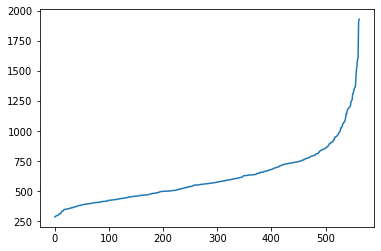

In [ ]:
#Calculate the distances of each point to its 5 (default) nearest neighbours
nn5 = NearestNeighbors(n_neighbors = 6) #we need to exclude the point itself!!!!
nn5_X = nn5.fit(X_features_3)
distances, indices = nn5_X.kneighbors(X_features_3)
print(distances) #prints distances o a point to each of its 5 nearest neighbours

#Plot this distances
distances = np.sort(distances, axis=0) #sort in ascending order
distances = distances[:,-1] #we want the distance to the fifth neighbor#
plt.plot(distances)

# K-Means

Predict number of clusters using Silhoutte method. The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

## K-means troubleshooting codes (delete later)

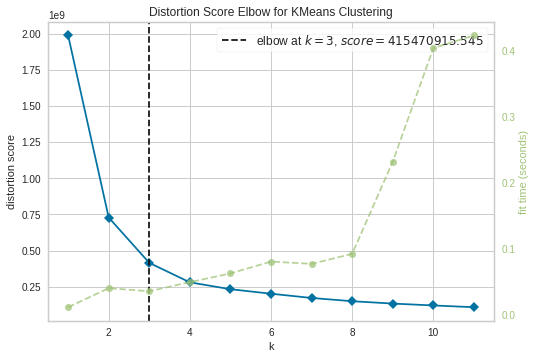

In [121]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X_features_2)
visualizer.show()


In [122]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(X2)
    
true_y2 =((y_values2[y_values2!=0]).astype(int) -1)
pred2 = (cluster_labels[y_values2!=0])
np.shape(y_values2)

print(np.shape(pred2))
print(pred2)


(81,)
[0 2 0 2 0 0 0 2 0 0 0 0 2 0 2 1 0 0 0 1 1 1 1 1 1 0 0 2 0 1 2 0 2 0 2 1 1
 0 2 2 2 1 1 1 2 1 1 1 1 0 2 2 2 1 2 1 1 0 2 2 2 0 2 1 2 0 2 1 1 0 0 0 0 1
 1 1 2 0 2 1 1]


In [123]:

print(np.shape(true_y2))
print(true_y2)

(81,)
[0 0 0 1 0 0 0 2 0 0 0 1 2 0 0 2 0 0 0 1 2 2 2 1 1 0 1 1 0 2 1 0 0 0 0 2 2
 0 0 0 0 2 2 1 0 1 2 2 1 0 0 0 0 2 0 2 1 0 0 1 1 0 1 1 0 0 1 2 2 1 0 0 0 1
 1 2 0 0 1 1 1]


> We need to make a multiclass confusion matrix function and calculate precision, recall, F1 and RI based on it.

> In unsupervised learning we cannot match examples with classes
but we can consider all pairs of points: N(N-1)/2



In [124]:
from sklearn.metrics.cluster import pair_confusion_matrix


confusion = pair_confusion_matrix(true_y2,pred2)
RI = rand_score(true_y2, pred2)
TN = confusion[0,0] 
TP = confusion[1,1] 
FP = confusion[0,1]
FN = confusion[1,0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*(precision*recall)/(precision+recall)

precision

0.5899621212121212

In [125]:
"""
• True Positive: a pair from the same group placed in the same cluster, C11
• True Negative: a pair from different groups placed in different clusters,  number of pairs with both clusterings having the samples not clustered together, C00
• False Positive: a pair from different groups placed in the same cluster, C01
• False Negative: a pair from the same group placed in different clusters, C10

SyntaxError: ignored

# K-means with 2 features

Predict number of clusters using Elbow method. 
In this plot, the number of clusters k is plotted against the distortion score, which is a total of within-cluster sum of squares for a given number of k. The optimal number of k is determined by a point where there is a bend in the curve (elbow). In this case, it is not very clear where we are seeing the bend, the best k = 3. However we could try a  range of k=2 to K=10 to check model performance.

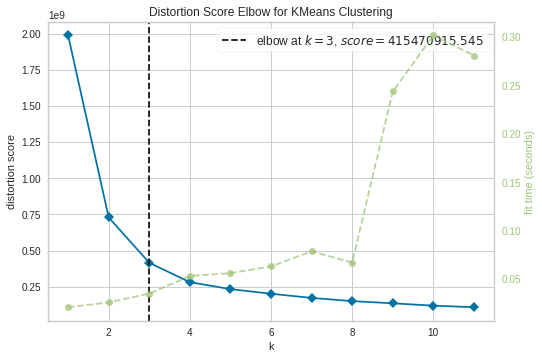

In [128]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X_features_2)
visualizer.show()

### Plot K-means clustering and add different performance metrics (based on 2 best features)

Here we need to report: Silhouette score, the Rand index, Precision, Recall, the F1 measure and the adjusted Rand index.
 Note that the adjusted Rand index can be computed using the adjusted_rand_score function and the silhouette score using silhouette_score, both from sklearn.metrics.

For n = 2 | The avg silhouette_score: 0.482 | R score: 0.68 | Adjusted R score: 0.362 | Precision: 0.546 | Recall: 0.75 | F1: 0.632
For n = 3 | The avg silhouette_score: 0.352 | R score: 0.693 | Adjusted R score: 0.322 | Precision: 0.59 | Recall: 0.525 | F1: 0.556
For n = 4 | The avg silhouette_score: 0.354 | R score: 0.676 | Adjusted R score: 0.249 | Precision: 0.585 | Recall: 0.393 | F1: 0.47
For n = 5 | The avg silhouette_score: 0.368 | R score: 0.664 | Adjusted R score: 0.203 | Precision: 0.572 | Recall: 0.324 | F1: 0.414
For n = 6 | The avg silhouette_score: 0.359 | R score: 0.658 | Adjusted R score: 0.181 | Precision: 0.564 | Recall: 0.293 | F1: 0.386
For n = 7 | The avg silhouette_score: 0.357 | R score: 0.643 | Adjusted R score: 0.138 | Precision: 0.525 | Recall: 0.257 | F1: 0.345
For n = 8 | The avg silhouette_score: 0.363 | R score: 0.637 | Adjusted R score: 0.115 | Precision: 0.509 | Recall: 0.228 | F1: 0.315


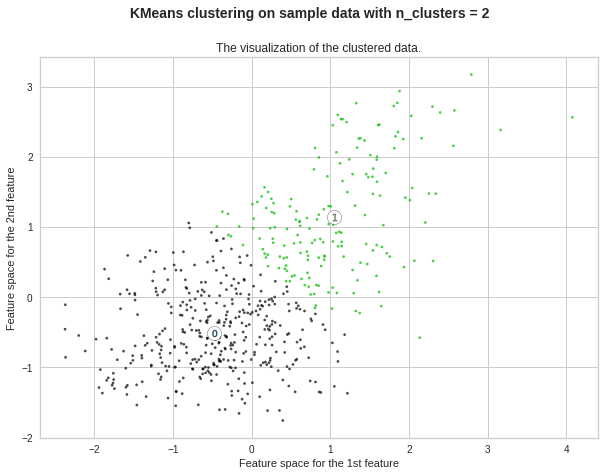

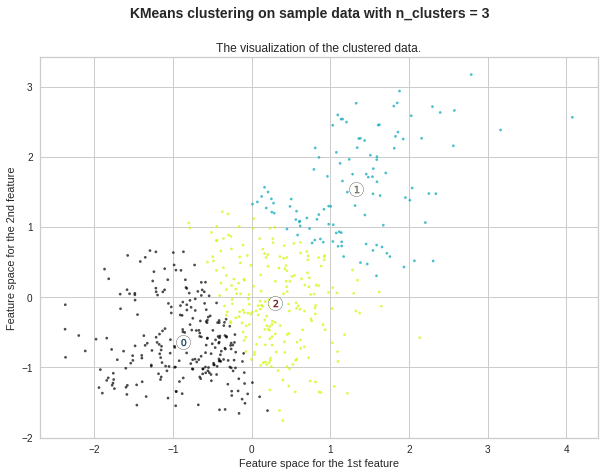

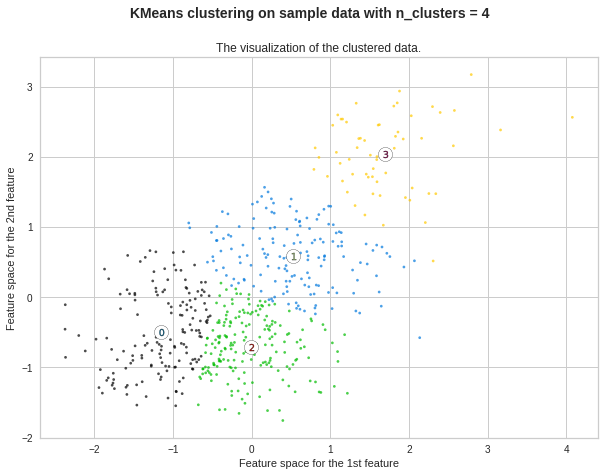

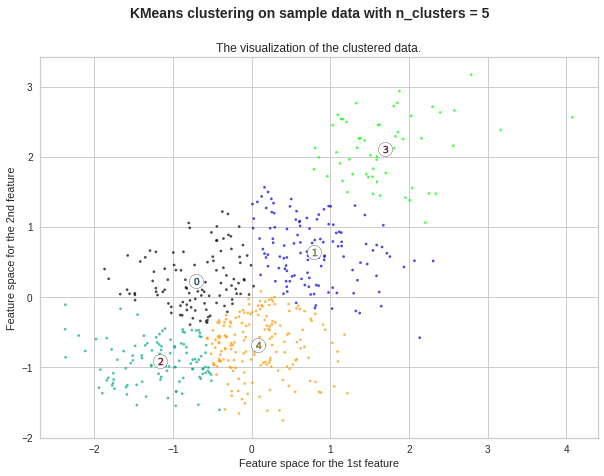

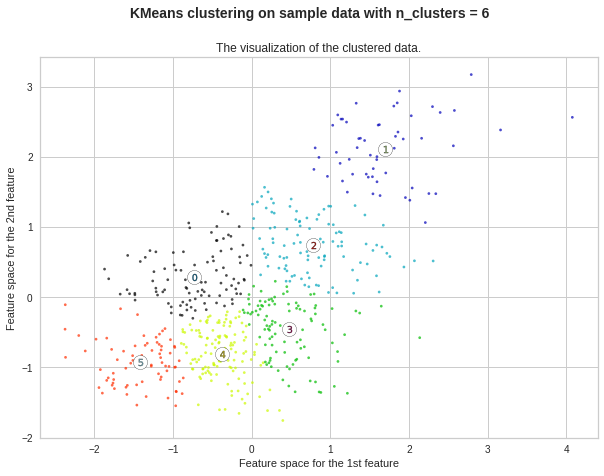

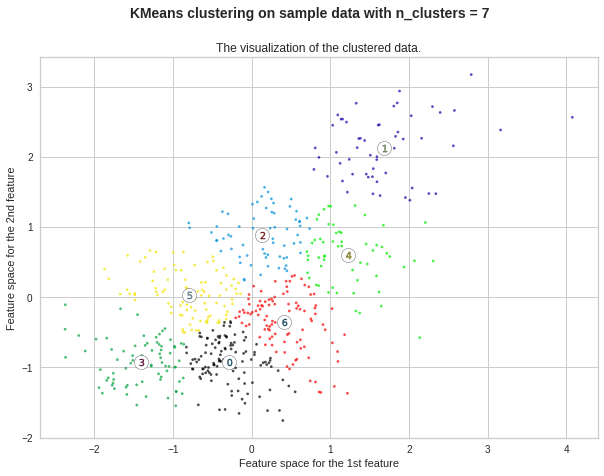

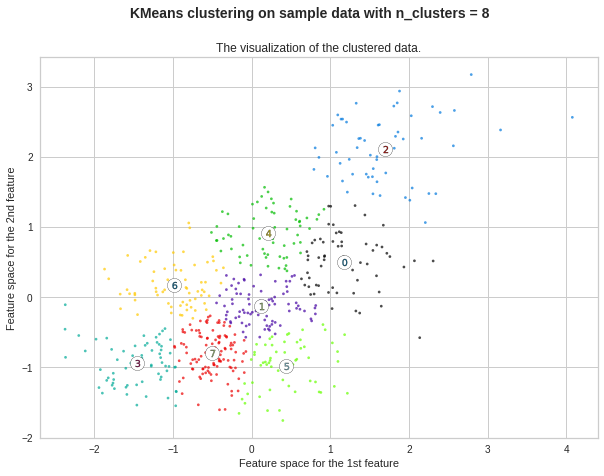

In [129]:
from tp2_aux import report_clusters

range_n_clusters = np.arange(2,9)

ids = (alldata_scaled2.index.values +1)


for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)
    
    true_y2 =((y_values2[y_values2!=0]).astype(int) -1)
    pred2 = (cluster_labels[y_values2!=0])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2, cluster_labels)
    RI = rand_score(true_y2, pred2)
    adj_rand_score = adjusted_rand_score(true_y2, pred2) 
    confusion = pair_confusion_matrix(true_y2,pred2)
    TN = confusion[0,0] 
    TP = confusion[1,1] 
    FP = confusion[0,1]
    FN = confusion[1,0]
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1 = 2*(precision*recall)/(precision+recall)
    
    print(
        "For n =",
        n_clusters,"|",
        "The avg silhouette_score:", 
        np.round(silhouette_avg,3), "|",
         "R score:",
        np.round(RI,3), "|",
        "Adjusted R score:",
        np.round(adj_rand_score,3),
        "|",
        "Precision:",
        np.round(precision,3),
        "|",
        "Recall:",
        np.round(recall,3),
        "|",
        "F1:",
        np.round(F1,3))

    """Report_clusters function generates html with cluster report
    ids is a 1D array with the id numbers of the images in the images/ folder
    labels is a 1D array with the corresponding cluster labels
    """

    #report_clusters(ids, cluster_labels, report_file) # how to use it?
    

    # Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(
        X2[:, 0], X2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



# K-means with 3 features

Elbow method estimates best k=4?

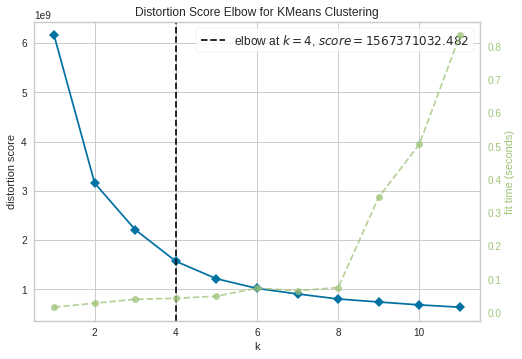

In [66]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X_features_3)
visualizer.show()

### Plot K-means clustering and add different performance metrics (based on  3 best features)

For n = 2 | The avg silhouette_score: 0.359 | R score: 0.731 | Adjusted R score: 0.473 | Precision: 0.591 | Recall: 0.863 | F1: 0.702
For n = 3 | The avg silhouette_score: 0.342 | R score: 0.675 | Adjusted R score: 0.293 | Precision: 0.56 | Recall: 0.531 | F1: 0.545
For n = 4 | The avg silhouette_score: 0.307 | R score: 0.675 | Adjusted R score: 0.283 | Precision: 0.563 | Recall: 0.502 | F1: 0.531
For n = 5 | The avg silhouette_score: 0.307 | R score: 0.68 | Adjusted R score: 0.269 | Precision: 0.587 | Recall: 0.428 | F1: 0.495
For n = 6 | The avg silhouette_score: 0.298 | R score: 0.682 | Adjusted R score: 0.256 | Precision: 0.606 | Recall: 0.378 | F1: 0.465
For n = 7 | The avg silhouette_score: 0.293 | R score: 0.68 | Adjusted R score: 0.222 | Precision: 0.636 | Recall: 0.294 | F1: 0.402
For n = 8 | The avg silhouette_score: 0.288 | R score: 0.676 | Adjusted R score: 0.203 | Precision: 0.637 | Recall: 0.265 | F1: 0.374


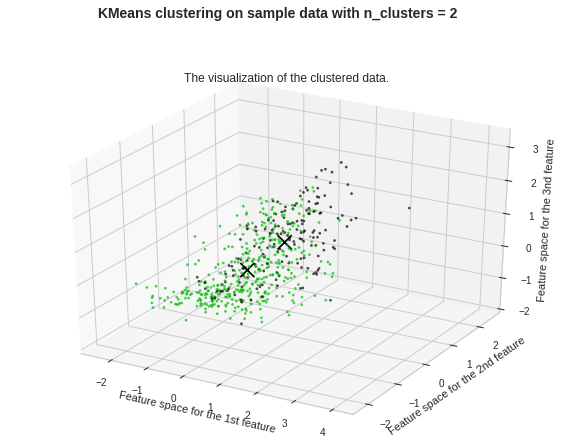

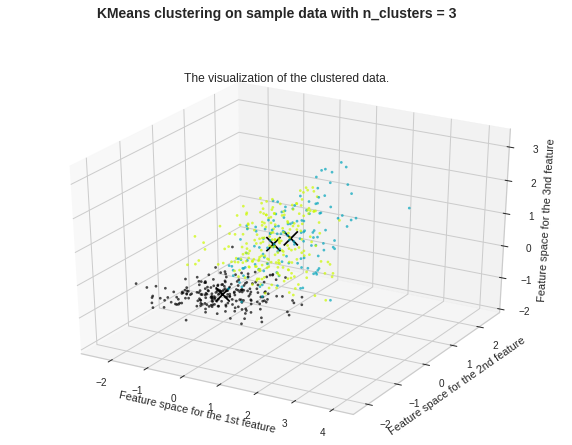

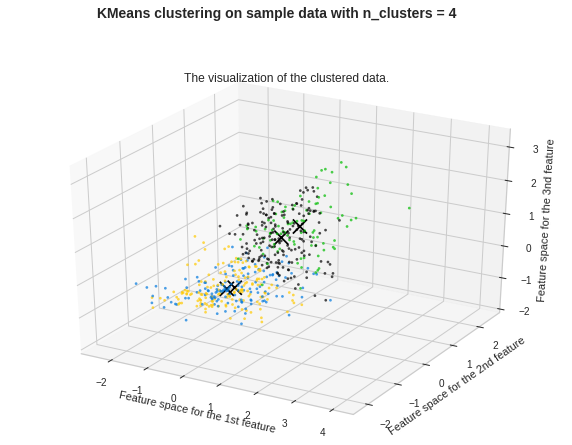

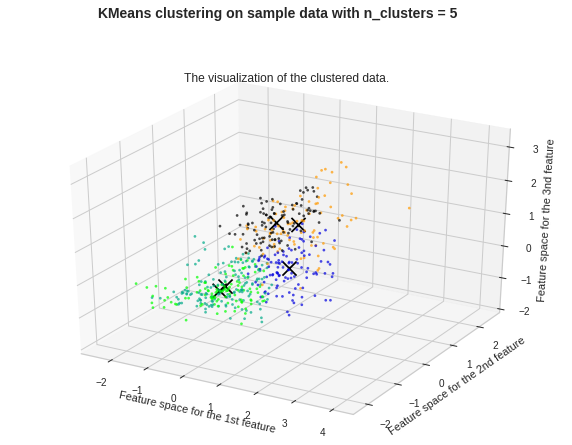

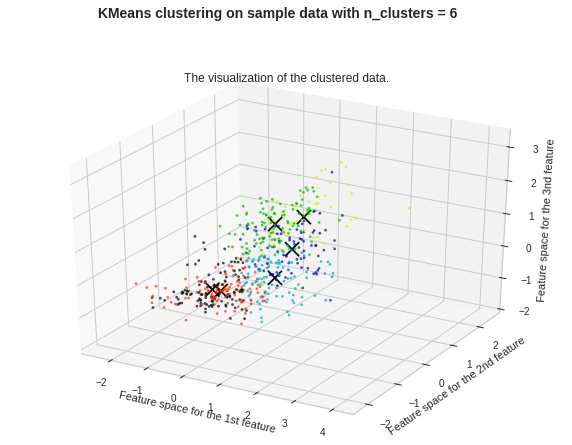

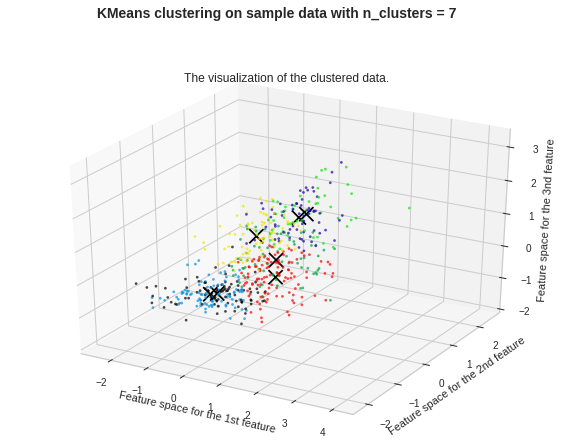

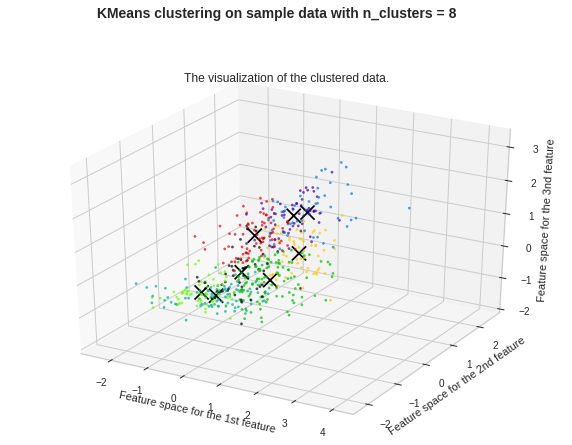

In [67]:
from tp2_aux import report_clusters
from mpl_toolkits.mplot3d import Axes3D

range_n_clusters = np.arange(2,9)

ids = (alldata_scaled3.index.values +1)


for n_clusters in range_n_clusters:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #fig2, ax2 = plt.subplots()
    fig.set_size_inches(10, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X3)

    true_y3 =((y_values3[y_values3!=0]).astype(int) -1)
    pred3 = (cluster_labels[y_values3!=0])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X3, cluster_labels)
    adj_rand_score = adjusted_rand_score(true_y3, pred3)
    RI = rand_score(true_y3, pred3)
    confusion = pair_confusion_matrix(true_y3,pred3)
    TN = confusion[0,0] 
    TP = confusion[1,1] 
    FP = confusion[0,1]
    FN = confusion[1,0]
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1 = 2*(precision*recall)/(precision+recall)
    
    print(
        "For n =",
        n_clusters,"|",
        "The avg silhouette_score:", 
        np.round(silhouette_avg,3), "|",
         "R score:",
        np.round(RI,3), "|",
        "Adjusted R score:",
        np.round(adj_rand_score,3),
        "|",
        "Precision:",
        np.round(precision,3),
        "|",
        "Recall:",
        np.round(recall,3),
        "|",
        "F1:",
        np.round(F1,3))


    """Report_clusters function generates html with cluster report
    ids is a 1D array with the id numbers of the images in the images/ folder
    labels is a 1D array with the corresponding cluster labels
    """

    #report_clusters(ids, cluster_labels, report_file) # how to use it?
    

    # Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax.scatter(
        X3[:, 0], X3[:, 1], X3[:,2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax.scatter(
        centers[:, 0],
        centers[:, 1],
        centers[:, 2],
        marker= "x",
        c="black",
        linewidths=1,
        alpha=1,
        s=200, label = 'centroid'
    )

  
    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")
    ax.set_zlabel("Feature space for the 3nd feature")

    plt.suptitle(
        "KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



### With k-means we selected dataset with 2 features and k=3 clusters for further examination.

For n = 8 | The avg silhouette_score: 0.352 | R score: 0.693 | Adjusted R score: 0.322 | Precision: 0.59 | Recall: 0.525 | F1: 0.556


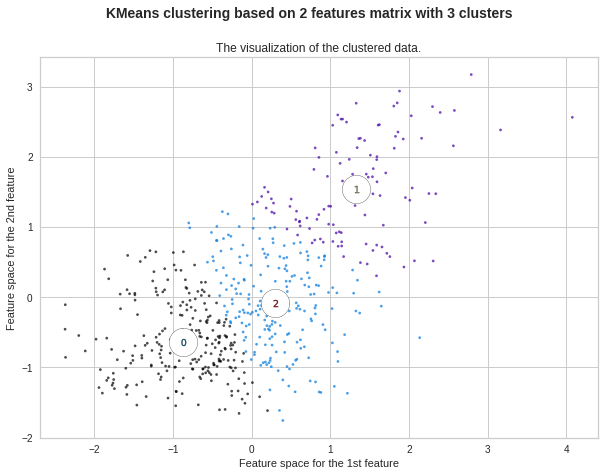

In [69]:
from tp2_aux import report_clusters
ids = (alldata_scaled2.index.values +1)

clusterer = KMeans(n_clusters=3, random_state=10, init = 'k-means++')
cluster_labels = clusterer.fit_predict(X2)
true_y2 =((y_values2[y_values2!=0]).astype(int) -1)
pred2 = (cluster_labels[y_values2!=0])
silhouette_avg = silhouette_score(X2, cluster_labels)
RI = rand_score(true_y2, pred2)
adj_rand_score = adjusted_rand_score(true_y2, pred2) 
confusion = pair_confusion_matrix(true_y2,pred2)
TN = confusion[0,0] 
TP = confusion[1,1] 
FP = confusion[0,1]
FN = confusion[1,0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*(precision*recall)/(precision+recall)
    

print(
        "For n =",
        n_clusters,"|",
        "The avg silhouette_score:", 
        np.round(silhouette_avg,3), "|",
         "R score:",
        np.round(RI,3), "|",
        "Adjusted R score:",
        np.round(adj_rand_score,3),
        "|",
        "Precision:",
        np.round(precision,3),
        "|",
        "Recall:",
        np.round(recall,3),
        "|",
        "F1:",
        np.round(F1,3))

#Plot data
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

# Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) 
ax.scatter(X2[:, 0], X2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k" )
# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=800,edgecolor="k",)

for i, c in enumerate(centers):
  ax.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
ax.set_title("The visualization of the clustered data.")
ax.set_xlabel("Feature space for the 1st feature")
ax.set_ylabel("Feature space for the 2nd feature")

plt.suptitle( "KMeans clustering based on 2 features matrix with 3 clusters", fontsize=14, fontweight="bold" )


                       
plt.show()



##Examine the performance
In addition, examine the performance of each algorithm (K-Means and DBSCAN) by varying the main parameter of each one (neighbourhood distance ε and number of clusters k; you can leave the other parameters with their default values)

##Select some parameter values
Finally, select some parameter values for closer examination by visually inspecting the clusters generated. For this you can use the report_clusters(ids, labels, report_file) function in the tp2_aux.py module.

In [131]:
from tp2_aux import report_clusters
ids = (alldata_scaled2.index.values)
print(ids)
report = report_clusters(ids, cluster_labels,  report_file='KMeans clustering based on 2 features matrix with 3 clusters.html')
files.download("KMeans clustering based on 2 features matrix with 3 clusters.html") 



[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Considering all the information gathered at this stage, recommend a procedure for the biologists that will help them process the segmented images, both for cell classification and to help discard segmentation errors.

# Optional exercise (2/20) - Bissecting K-Means hierarchical clustering (lecture 19)
Top-down: divisive (bisecting k-means)
Example of hierarchical divisive clustering. The possibility of stopping at any desired level makes this process less time-consuming, although it is a divisive cluster (usually O(2^n)). 

Implement the bissecting K-Means hierarchical clustering algorithm, as described in lecture 19. This can be done using the KMeans classifier available in the Scikit-Learn library to split each cluster into two sub-clusters with k = 2. Repeat this process by splitting the cluster with the largest number of examples in each iteration for a predetermined number of iterations. The output should be a list of lists, with each list corresponding to one example and listing all cluster labels to which the example was assigned, in order. Here is an example of using bissecting K-Means for three iterations on five examples. The first example was placed on cluster of index 1 in the first iteration, with the remainder on cluster of index 0. Then the third example was placed on sub-cluster of index 1, the other three on the sub-cluster of index 0. Of these, the second and fourth examples were placed in sub-sub-cluster 0 ([0, 0, 0]) and the fifth example on sub-sub-cluster of index 1 ([0, 0, 1]):

 https://medium.com/@afrizalfir/bisecting-kmeans-clustering-5bc17603b8a2
*   1) Set K to define the number of cluster
*   2) Set all data as a single cluster
*   3) Use K-means with K=2 to split the cluster
*   4) Measure the distance for each intra cluster (sum of squares distance)
*   5) Select the cluster that have the largest distance and split to 2 cluster using K-means.
*   6) Repeat step 3–5 until the number of leaf cluster = K.












In [85]:
k = 2
from sklearn.cluster import KMeans
import numpy as np
X_2_test = np.array([[1, 1], [1, 1], [1, 0], [1, 2], [10, 4], [5, 0]])
X_2_test
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_2_test)

#kmeans.labels_
#kmeans.predict([[0, 0], [12, 3]])
#kmeans.cluster_centers_



In [86]:
X_2_test

array([[ 1,  1],
       [ 1,  1],
       [ 1,  0],
       [ 1,  2],
       [10,  4],
       [ 5,  0]])

In [90]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1], dtype=int32)

In [92]:
list1 = kmeans.labels_


array([1, 1, 1, 1, 0, 1], dtype=int32)

Cluster that is 0 will have smallest intracluster distance and put it into a list (position 0), cluster with label 1 will have larger distance. We append label of cluster 1 into list position 1 to N. And split points belonging to cluster 1 further?

In [84]:
np.shape(kmeans.labels_)

(6,)

In [80]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [81]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)